## Step 1: Import files and data 

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [69]:
df = pd.read_csv('iris.csv')


## Exploratory data analysis before trainning

In [70]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [71]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [72]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [73]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [74]:
df.duplicated().sum()

1

In [75]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [76]:
df ['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     49
Name: variety, dtype: int64

In [77]:
df['variety']= df['variety'].map({'Setosa':0,'Versicolor':1,'Virginica':2})

In [78]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [79]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [80]:
corr= df.corr()
corr.shape

(5, 5)

In [81]:
corr

,sepal.length,sepal.width,petal.length,petal.width,variety
sepal.length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal.width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal.length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal.width,0.820620,-0.362894,0.962772,1.000000,0.956514
variety,0.786971,-0.422987,0.949402,0.956514,1.000000


In [82]:
x = df.drop(columns = "variety")
y = df['variety']

## Train Test split method

In [83]:
x_train,x_test, y_train,y_test = train_test_split(x,y ,test_size = 0.2,random_state = 1)
# har bar ek jesa nikalne k lie random state use karte hai
print(x_train.shape[0])
print(x_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

119
30
119
30


In [84]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width,variety
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Building model SVM

In [85]:
from sklearn.svm import SVC
sv_classifier = SVC(kernel = 'linear',random_state = 1)

# Training model
sv_classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=1)

In [86]:
print("train accuracy :",sv_classifier.score(x_train,y_train))
print("test accuracy :",sv_classifier.score(x_test,y_test))

train accuracy : 0.9831932773109243
test accuracy : 1.0


## Prediction results:

In [87]:
from sklearn.metrics import confusion_matrix

y_pred = sv_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

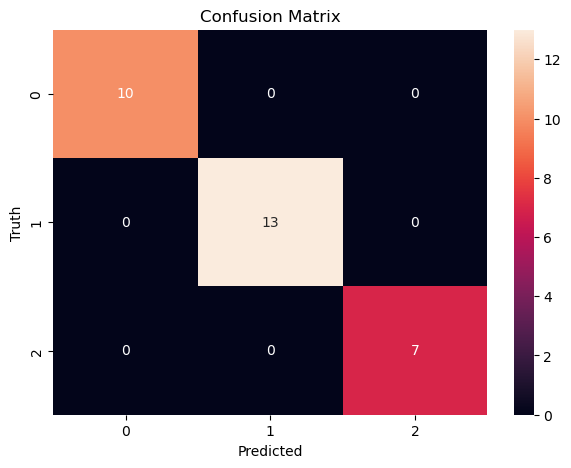

In [88]:
%matplotlib inline 
import seaborn as sns
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy', accuracy_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred,average = 'weighted'))
print('precision',precision_score(y_test,y_pred,average = 'weighted'))
print('f1',f1_score(y_test,y_pred,average = 'weighted'))

accuracy 1.0
recall 1.0
precision 1.0
f1 1.0


## Preparing pairplot and scatterplot within the columns

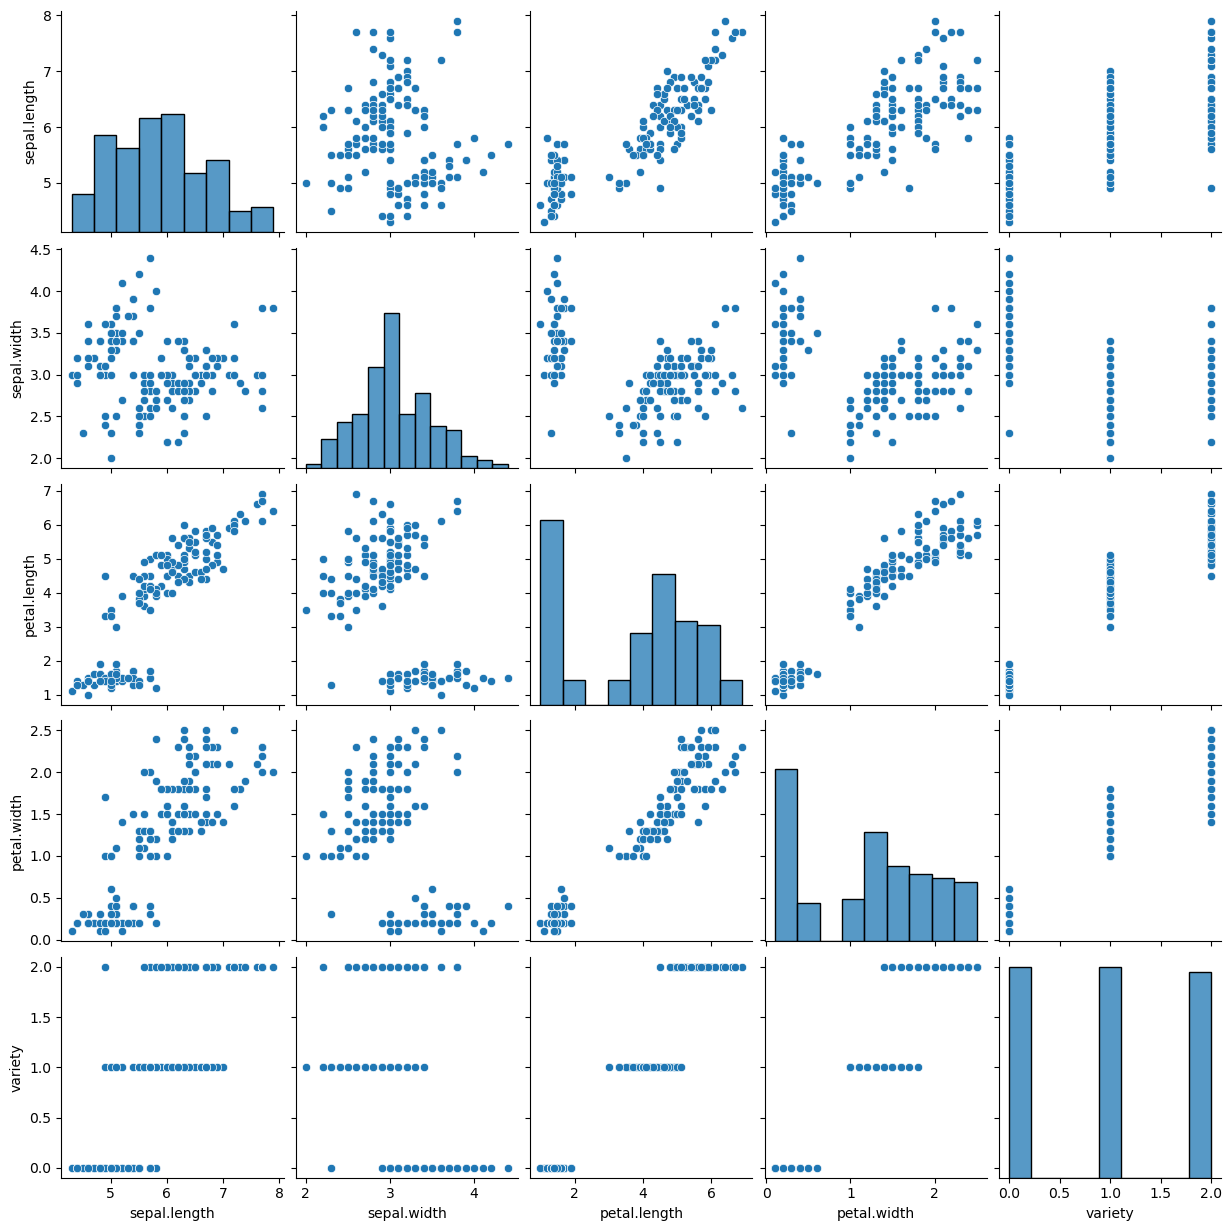

In [98]:
sns.pairplot(df)

<Axes: xlabel='sepal.length', ylabel='petal.length'>

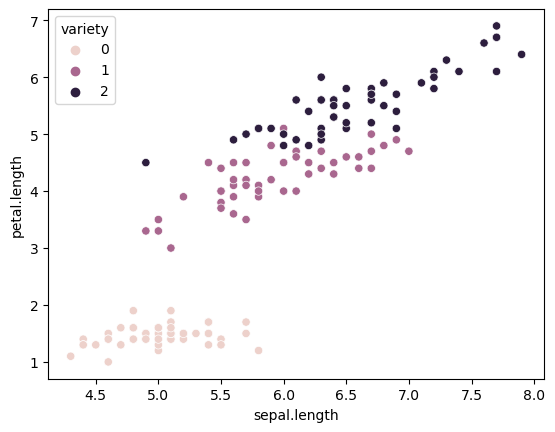

In [99]:
sns.scatterplot(x = 'sepal.length', y = 'petal.length',data = df,hue = 'variety')

<Axes: xlabel='sepal.width', ylabel='petal.width'>

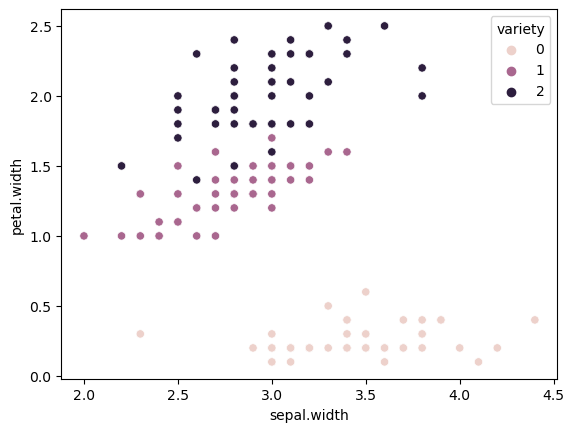

In [100]:
sns.scatterplot(x = 'sepal.width', y = 'petal.width',data = df,hue = 'variety')